In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
 !pip install ipywidgets
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.3 MB/s eta 0:00:0000:01


In [4]:
conv = {
  "data": [
    {"agent": "Hello, thank you for calling XYZ Telecommunications. My name is Alice. How can I assist you today?"},
    {"customer": "Hi Alice, I'm having some trouble with my internet connection. It keeps dropping every few minutes."},
    {"agent": "I'm sorry to hear that you're experiencing issues with your internet connection. I can help you with that. Can I have your account number or phone number associated with the account to pull up your information?"},
    {"customer": "Sure, my account number is 123456789."},
    {"agent": "Thank you. Let me pull up your account details. Please hold for a moment."},
    {"agent": "Thank you for waiting. I see that you are experiencing frequent disconnections. I will run a diagnostic test on your line. This will take a few minutes. Is that okay?"},
    {"customer": "Yes, that's fine."},
    {"agent": "Great. Please hold on while I run the test."},
    {"agent": "The diagnostic test is in progress. Can you please confirm if the lights on your modem are on and stable?"},
    {"customer": "The power light is on, but the internet light keeps blinking."},
    {"agent": "Thank you for that information. It seems like there might be an issue with the signal. Have you tried rebooting your modem?"},
    {"customer": "Yes, I have rebooted it several times, but the issue persists."},
    {"agent": "Understood. I can see from the diagnostic test that there is a signal issue. I will need to reset your connection from our end. This will take a few minutes, and you may be disconnected from the internet temporarily. Is that okay?"},
    {"customer": "Yes, go ahead."},
    {"agent": "Thank you. I am resetting your connection now. Please hold on."},
    {"agent": "The reset process is complete. Can you please check if your internet connection is stable now?"},
    {"customer": "It looks like the internet light is stable now. Let me try to browse a website."},
    {"customer": "Yes, it seems to be working fine now. Thank you, Alice."},
    {"agent": "I'm glad to hear that your connection is stable now. Is there anything else I can assist you with today?"},
    {"customer": "Actually, yes. I have a question about my latest bill. It seems higher than usual."},
    {"agent": "I can help with that. Let me check your billing details. Please hold for a moment."},
    {"agent": "Thank you for waiting. I see that there was an additional charge for exceeding your data limit last month. Your plan includes 500 GB of data, and you used 550 GB."},
    {"customer": "I wasn't aware that I had a data limit. Is there any way to avoid these extra charges?"},
    {"agent": "We offer an unlimited data plan that might be more suitable for your needs. Would you like more information on that?"},
    {"customer": "Yes, please."},
    {"agent": "Our unlimited data plan is an additional $20 per month and provides unlimited data usage without any extra charges. Would you like to switch to this plan?"},
    {"customer": "Yes, that sounds good. Please switch me to the unlimited data plan."},
    {"agent": "Sure, I will make the changes to your account. Please hold on for a moment."},
    {"agent": "The changes have been made, and you are now on the unlimited data plan. Is there anything else I can assist you with today?"},
    {"customer": "No, that's all. Thank you so much for your help."},
    {"agent": "You're welcome! Thank you for calling XYZ Telecommunications. Have a great day!"},
    {"customer": "You too, bye."}
  ]
}

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
sentences = [ list(x.values())[0] for x in conv['data']]
sentences

['Hello, thank you for calling XYZ Telecommunications. My name is Alice. How can I assist you today?',
 "Hi Alice, I'm having some trouble with my internet connection. It keeps dropping every few minutes.",
 "I'm sorry to hear that you're experiencing issues with your internet connection. I can help you with that. Can I have your account number or phone number associated with the account to pull up your information?",
 'Sure, my account number is 123456789.',
 'Thank you. Let me pull up your account details. Please hold for a moment.',
 'Thank you for waiting. I see that you are experiencing frequent disconnections. I will run a diagnostic test on your line. This will take a few minutes. Is that okay?',
 "Yes, that's fine.",
 'Great. Please hold on while I run the test.',
 'The diagnostic test is in progress. Can you please confirm if the lights on your modem are on and stable?',
 'The power light is on, but the internet light keeps blinking.',
 'Thank you for that information. It seem

In [59]:
every_sentence = []
for x in ''.join(sentences).split('?'):
    for u in x.split('.'):
        every_sentence.append(u)
        

In [60]:
every_sentence

['Hello, thank you for calling XYZ Telecommunications',
 ' My name is Alice',
 ' How can I assist you today',
 "Hi Alice, I'm having some trouble with my internet connection",
 ' It keeps dropping every few minutes',
 "I'm sorry to hear that you're experiencing issues with your internet connection",
 ' I can help you with that',
 ' Can I have your account number or phone number associated with the account to pull up your information',
 'Sure, my account number is 123456789',
 'Thank you',
 ' Let me pull up your account details',
 ' Please hold for a moment',
 'Thank you for waiting',
 ' I see that you are experiencing frequent disconnections',
 ' I will run a diagnostic test on your line',
 ' This will take a few minutes',
 ' Is that okay',
 "Yes, that's fine",
 'Great',
 ' Please hold on while I run the test',
 'The diagnostic test is in progress',
 ' Can you please confirm if the lights on your modem are on and stable',
 'The power light is on, but the internet light keeps blinking',

In [16]:
# Tokenization of each document
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
print(tokenized_sent)

[['hello', ',', 'thank', 'you', 'for', 'calling', 'xyz', 'telecommunications', '.', 'my', 'name', 'is', 'alice', '.', 'how', 'can', 'i', 'assist', 'you', 'today', '?'], ['hi', 'alice', ',', 'i', "'m", 'having', 'some', 'trouble', 'with', 'my', 'internet', 'connection', '.', 'it', 'keeps', 'dropping', 'every', 'few', 'minutes', '.'], ['i', "'m", 'sorry', 'to', 'hear', 'that', 'you', "'re", 'experiencing', 'issues', 'with', 'your', 'internet', 'connection', '.', 'i', 'can', 'help', 'you', 'with', 'that', '.', 'can', 'i', 'have', 'your', 'account', 'number', 'or', 'phone', 'number', 'associated', 'with', 'the', 'account', 'to', 'pull', 'up', 'your', 'information', '?'], ['sure', ',', 'my', 'account', 'number', 'is', '123456789', '.'], ['thank', 'you', '.', 'let', 'me', 'pull', 'up', 'your', 'account', 'details', '.', 'please', 'hold', 'for', 'a', 'moment', '.'], ['thank', 'you', 'for', 'waiting', '.', 'i', 'see', 'that', 'you', 'are', 'experiencing', 'frequent', 'disconnections', '.', 'i'

In [7]:

def cosine(u, v):
    size = min(len(u)-1,len(v)-1)
    return np.dot(u[:size], v[:size]) / (np.linalg.norm(u[:size]) * np.linalg.norm(v[:size]))

In [12]:
# xis the current index and n is the window range ; l is maximum length of the array
def get_min_max_index(x,l, n):
    min_val = min(x-n,x)
    if(min_val<0):
        min_val=0
    
    max_val = max(x,x+n)
    if(max_val>l-1):
        max_val=l
    
    return range(min_val, max_val+1)
    

In [10]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-06-11 18:15:28.028419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 18:15:28.028591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 18:15:28.187360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [61]:
sentences = every_sentence

l = len(sentences)
n = 2
x = 13

# print(focus_sentences)
# main_index = int(len(focus_sentences)/n)
# print(main_index)
to_plot = []
for cur_index in range(0,len(sentences)):
    focus_sentences = [sentences[x] for x in get_min_max_index(cur_index,l,n)]
    main_index = int(len(focus_sentences)/n)
    query_vector = sbert_model.encode([focus_sentences[main_index]])[0]
    average_similarity_score = sum([cosine(sbert_model.encode([focus_sentences[i]])[0],query_vector) for i in range(len(focus_sentences)) if i!=main_index])/(len(focus_sentences)-1)
    to_plot.append({'index':cur_index,'sim':average_similarity_score})
#     print(average_similarity_score,"   ",sentences[cur_index])

# for sent in sentences:
#     sim = cosine(query_vector,sbert_model.encode([sent])[0] sbert_model.encode([sent])[0])
#     print("Sentence = ", sent, "; similarity = ", sim)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

IndexError: list index out of range

In [18]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='index', ylabel='sim'>

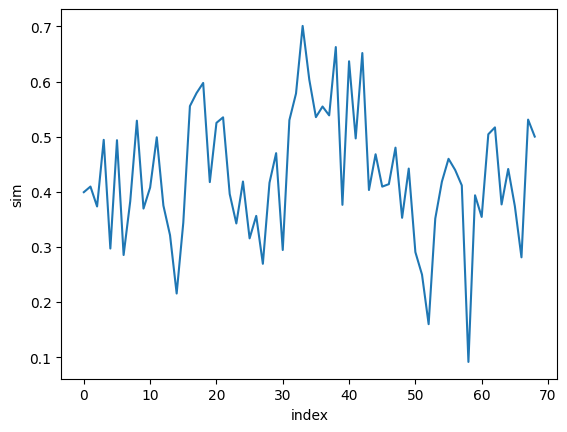

In [62]:
ssdf = pd.DataFrame(to_plot)
sns.lineplot(ssdf,x='index',y='sim')

In [73]:
threshold = ssdf['sim'].quantile(0.1)
print(threshold)
list(ssdf.loc[ssdf['sim']<threshold,:]['index'])

0.289529781229794


[6, 14, 27, 51, 52, 58, 66]

In [71]:
start_index = 0
chunks = []
for r in list(ssdf.loc[ssdf['sim']<threshold,:]['index']):
    chunks.append(' '.join(sentences[start_index:r-1]))
    start_index = r-1

In [72]:
for c in chunks:
    print('-'*10)
    print(c)
    print('-'*10)

----------
Hello, thank you for calling XYZ Telecommunications  My name is Alice  How can I assist you today Hi Alice, I'm having some trouble with my internet connection  It keeps dropping every few minutes
----------
----------
I'm sorry to hear that you're experiencing issues with your internet connection  I can help you with that  Can I have your account number or phone number associated with the account to pull up your information Sure, my account number is 123456789 Thank you  Let me pull up your account details  Please hold for a moment Thank you for waiting
----------
----------
 I see that you are experiencing frequent disconnections  I will run a diagnostic test on your line  This will take a few minutes  Is that okay Yes, that's fine Great  Please hold on while I run the test The diagnostic test is in progress  Can you please confirm if the lights on your modem are on and stable The power light is on, but the internet light keeps blinking Thank you for that information  It s

In [30]:
ssdf

,index,sim
0,0,0.424853
1,1,0.501220
2,2,0.522445
3,3,0.362731
4,4,0.543160
5,5,0.368486
6,6,0.310577
7,7,0.504482
8,8,0.559847
9,9,0.512885


In [47]:
sentence_embeddings = sbert_model.encode(sentences)

#print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
sentences

['Hello, thank you for calling XYZ Telecommunications. My name is Alice. How can I assist you today?',
 "Hi Alice, I'm having some trouble with my internet connection. It keeps dropping every few minutes.",
 "I'm sorry to hear that you're experiencing issues with your internet connection. I can help you with that. Can I have your account number or phone number associated with the account to pull up your information?",
 'Sure, my account number is 123456789.',
 'Thank you. Let me pull up your account details. Please hold for a moment.',
 'Thank you for waiting. I see that you are experiencing frequent disconnections. I will run a diagnostic test on your line. This will take a few minutes. Is that okay?',
 "Yes, that's fine.",
 'Great. Please hold on while I run the test.',
 'The diagnostic test is in progress. Can you please confirm if the lights on your modem are on and stable?',
 'The power light is on, but the internet light keeps blinking.',
 'Thank you for that information. It seem

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Hello, thank you for calling XYZ Telecommunications. My name is Alice. How can I assist you today? ; similarity =  0.23963459


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Hi Alice, I'm having some trouble with my internet connection. It keeps dropping every few minutes. ; similarity =  0.013887362


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  I'm sorry to hear that you're experiencing issues with your internet connection. I can help you with that. Can I have your account number or phone number associated with the account to pull up your information? ; similarity =  0.0316925


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Sure, my account number is 123456789. ; similarity =  0.50262046


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Thank you. Let me pull up your account details. Please hold for a moment. ; similarity =  0.38259694


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Thank you for waiting. I see that you are experiencing frequent disconnections. I will run a diagnostic test on your line. This will take a few minutes. Is that okay? ; similarity =  0.07092192


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Yes, that's fine. ; similarity =  0.80792713


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Great. Please hold on while I run the test. ; similarity =  0.33995917


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  The diagnostic test is in progress. Can you please confirm if the lights on your modem are on and stable? ; similarity =  0.22754048


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  The power light is on, but the internet light keeps blinking. ; similarity =  0.1690749


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Thank you for that information. It seems like there might be an issue with the signal. Have you tried rebooting your modem? ; similarity =  0.24305023


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Yes, I have rebooted it several times, but the issue persists. ; similarity =  0.23962551


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Understood. I can see from the diagnostic test that there is a signal issue. I will need to reset your connection from our end. This will take a few minutes, and you may be disconnected from the internet temporarily. Is that okay? ; similarity =  0.06704977


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Yes, go ahead. ; similarity =  0.8729077


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Thank you. I am resetting your connection now. Please hold on. ; similarity =  0.5590011


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  The reset process is complete. Can you please check if your internet connection is stable now? ; similarity =  0.24942668


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  It looks like the internet light is stable now. Let me try to browse a website. ; similarity =  0.3123669


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Yes, it seems to be working fine now. Thank you, Alice. ; similarity =  0.5292167


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  I'm glad to hear that your connection is stable now. Is there anything else I can assist you with today? ; similarity =  0.36923474


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Actually, yes. I have a question about my latest bill. It seems higher than usual. ; similarity =  0.41677013


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  I can help with that. Let me check your billing details. Please hold for a moment. ; similarity =  0.3466017


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Thank you for waiting. I see that there was an additional charge for exceeding your data limit last month. Your plan includes 500 GB of data, and you used 550 GB. ; similarity =  -0.04003312


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  I wasn't aware that I had a data limit. Is there any way to avoid these extra charges? ; similarity =  0.104800016


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  We offer an unlimited data plan that might be more suitable for your needs. Would you like more information on that? ; similarity =  0.37738392


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Yes, please. ; similarity =  0.9044471


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Our unlimited data plan is an additional $20 per month and provides unlimited data usage without any extra charges. Would you like to switch to this plan? ; similarity =  0.093002506


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Yes, that sounds good. Please switch me to the unlimited data plan. ; similarity =  0.5460271


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  Sure, I will make the changes to your account. Please hold on for a moment. ; similarity =  0.34717995


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  The changes have been made, and you are now on the unlimited data plan. Is there anything else I can assist you with today? ; similarity =  0.39616486


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  No, that's all. Thank you so much for your help. ; similarity =  0.44881168


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  You're welcome! Thank you for calling XYZ Telecommunications. Have a great day! ; similarity =  0.34245887


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sentence =  You too, bye. ; similarity =  0.67370063
